In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [2]:
x = data.data
y = data.target
features = data.feature_names
# print(features)
df = pd.DataFrame(x, columns=features)
df["Prices"] = y

In [3]:
print(df.shape)
print()
print(features)
print()
print(df.head(5))
print()
print(y[:5])

(20640, 9)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Prices  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

[4.526 3.585 3.521 3.413 3.422]


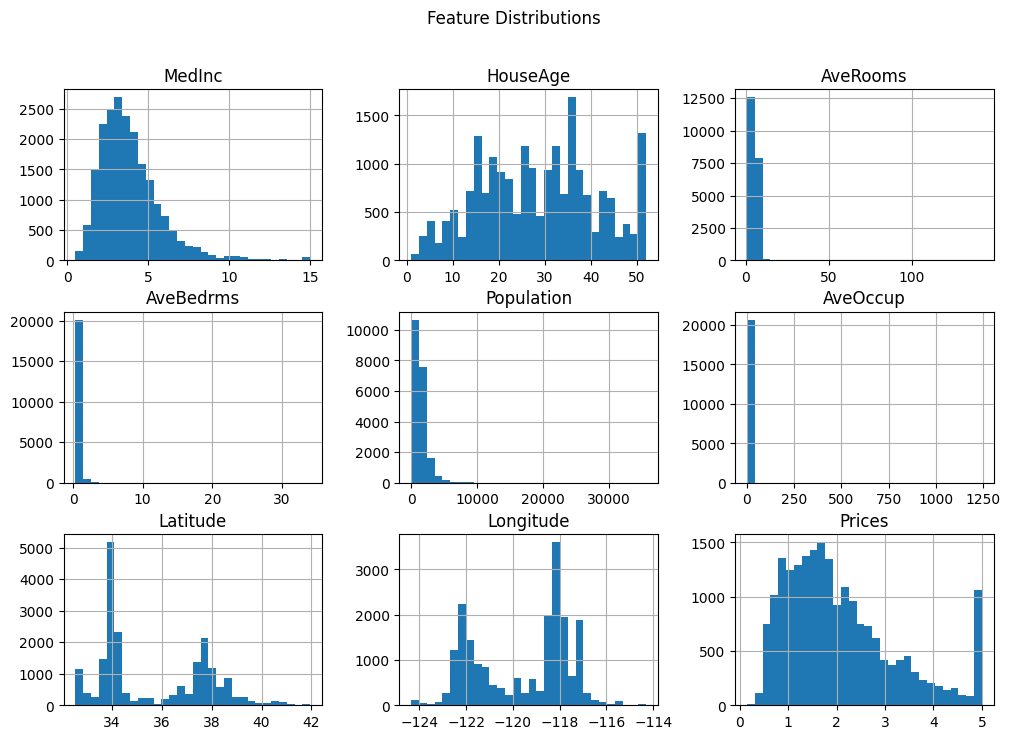

In [4]:
df.hist(figsize=(12,8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

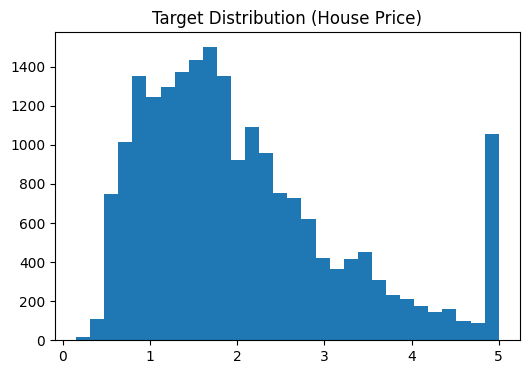

In [5]:
plt.figure(figsize=(6,4))
plt.hist(df["Prices"], bins=30)
plt.title("Target Distribution (House Price)")
plt.show()

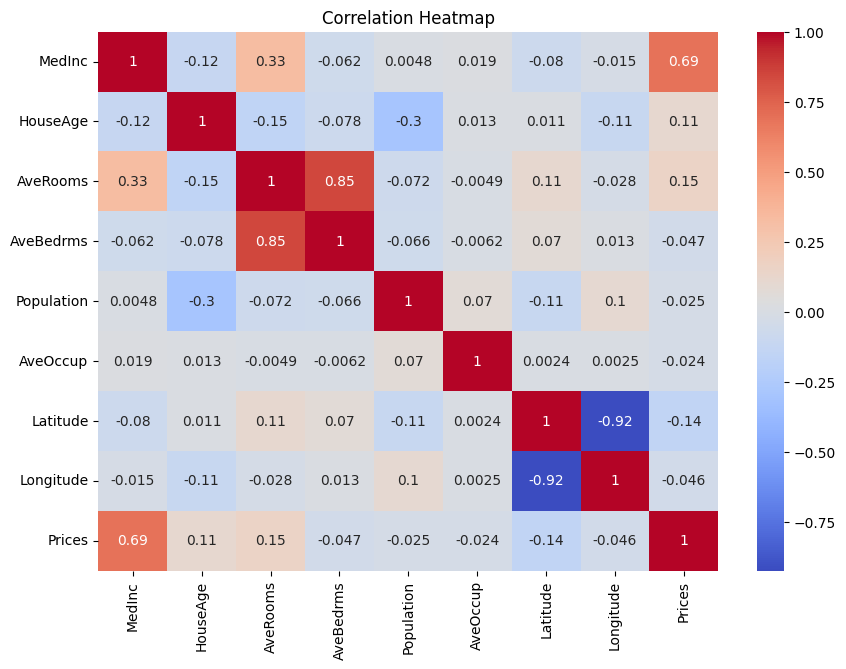

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
y = df["Prices"]
x = df.drop("Prices", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, random_state=42, test_size=0.2)


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

R2 = r2_score(y_test, y_pred)
print("R2:", R2)

MSE: 0.555891598695244
R2: 0.5757877060324511
